# Importing Libraries/Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [3]:
IMG_SIZE = (512, 768)
BATCH = 32
SEED = 42

In [4]:
main_path = '/content/drive/MyDrive/Compressed_PCA_images'


train_path = os.path.join(main_path,"Train/Labeled")
test_path=os.path.join(main_path,"Test")

train_fl = glob.glob(train_path+"/Flooded/*.jpg") #norm
train_nfl = glob.glob(train_path+"/Non-Flooded/*.jpg") #pneu

test_fl = glob.glob(test_path+"/Flooded/*.jpg")
test_nfl = glob.glob(test_path+"/Non-Flooded/*.jpg")

In [5]:
train_list = [x for x in train_fl]
train_list.extend([x for x in train_nfl])

df_train = pd.DataFrame(np.concatenate([['Flooded']*len(train_fl) , ['Non-Flooded']*len(train_nfl)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_fl]
test_list.extend([x for x in test_nfl])

df_test = pd.DataFrame(np.concatenate([['Flooded']*len(test_fl) , ['Non-Flooded']*len(test_nfl)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [6]:
df_train

class  \
0         Flooded   
1         Flooded   
2         Flooded   
3         Flooded   
4         Flooded   
...           ...   
1890  Non-Flooded   
1891  Non-Flooded   
1892  Non-Flooded   
1893  Non-Flooded   
1894  Non-Flooded   

                                                                                image  
0         /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Flooded/6707.jpg  
1         /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Flooded/7273.jpg  
2         /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Flooded/7488.jpg  
3         /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Flooded/7405.jpg  
4         /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Flooded/7524.jpg  
...                                                                               ...  
1890  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8297.jpg  
1891  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/6409.jpg  
1892  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/7167.jpg  
1893  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/6800.jpg  
1894  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/7722.jpg  

[1895 rows x 2 columns]

In [7]:
df_test

class  \
0        Flooded   
1        Flooded   
2        Flooded   
3        Flooded   
4        Flooded   
..           ...   
443  Non-Flooded   
444  Non-Flooded   
445  Non-Flooded   
446  Non-Flooded   
447  Non-Flooded   

                                                                      image  
0        /content/drive/MyDrive/Compressed_PCA_images/Test/Flooded/7450.jpg  
1        /content/drive/MyDrive/Compressed_PCA_images/Test/Flooded/6700.jpg  
2        /content/drive/MyDrive/Compressed_PCA_images/Test/Flooded/7486.jpg  
3        /content/drive/MyDrive/Compressed_PCA_images/Test/Flooded/7284.jpg  
4        /content/drive/MyDrive/Compressed_PCA_images/Test/Flooded/7476.jpg  
..                                                                      ...  
443  /content/drive/MyDrive/Compressed_PCA_images/Test/Non-Flooded/9060.jpg  
444  /content/drive/MyDrive/Compressed_PCA_images/Test/Non-Flooded/7004.jpg  
445  /content/drive/MyDrive/Compressed_PCA_images/Test/Non-Flooded/6827.jpg  
446  /content/drive/MyDrive/Compressed_PCA_images/Test/Non-Flooded/9055.jpg  
447  /content/drive/MyDrive/Compressed_PCA_images/Test/Non-Flooded/7915.jpg  

[448 rows x 2 columns]

# EDA

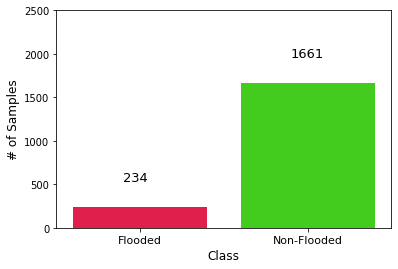

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="prism_r")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,2500)
plt.xticks([0,1], ['Flooded', 'Non-Flooded'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

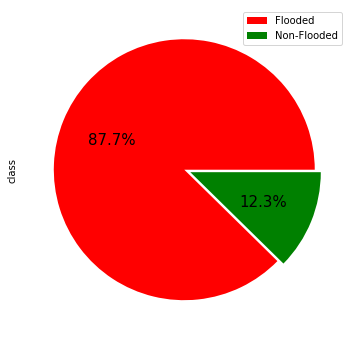

In [ ]:
plt.figure(figsize=(6,6))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['red','green'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Flooded', 'Non-Flooded'])
plt.show()

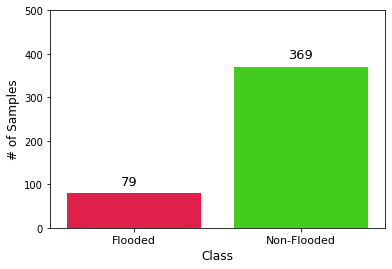

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="prism_r")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Flooded', 'Non-Flooded'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

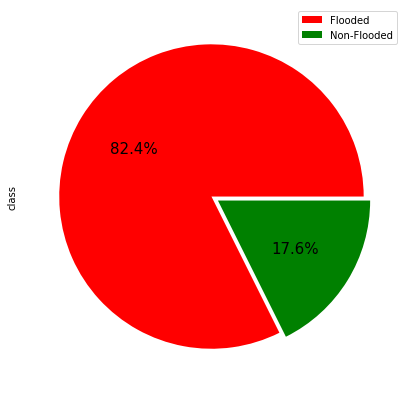

In [ ]:
plt.figure(figsize=(7,7))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['red','green'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Flooded', 'Non-Flooded'])
plt.show()

Train Set - Flooded


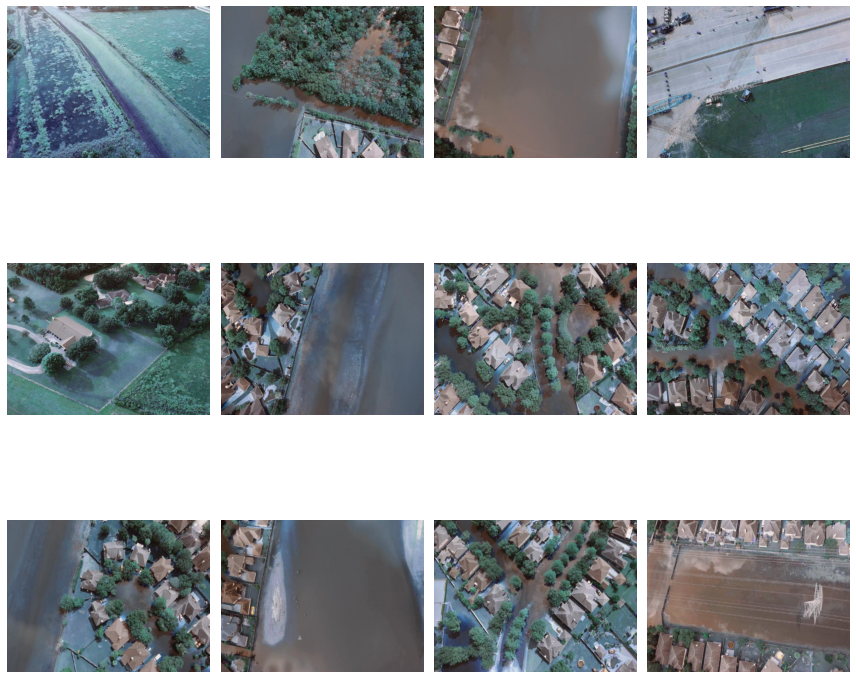

In [ ]:
print('Train Set - Flooded')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_fl[i])
    img = cv2.resize(img, (400,300))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Non-Flooded


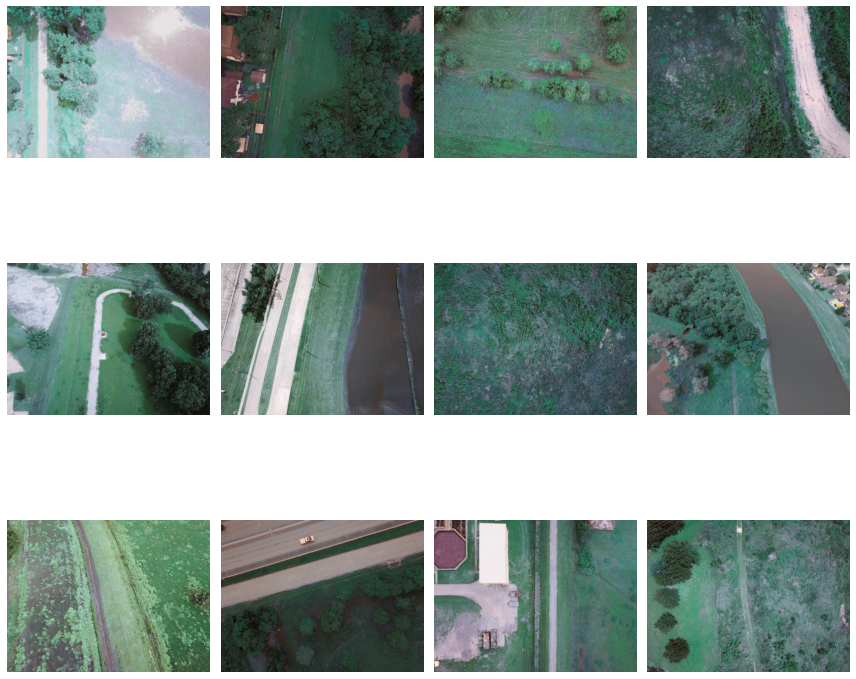

In [ ]:
print('Train Set - Non-Flooded')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_nfl[i])
    img = cv2.resize(img, (400,300))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Flooded


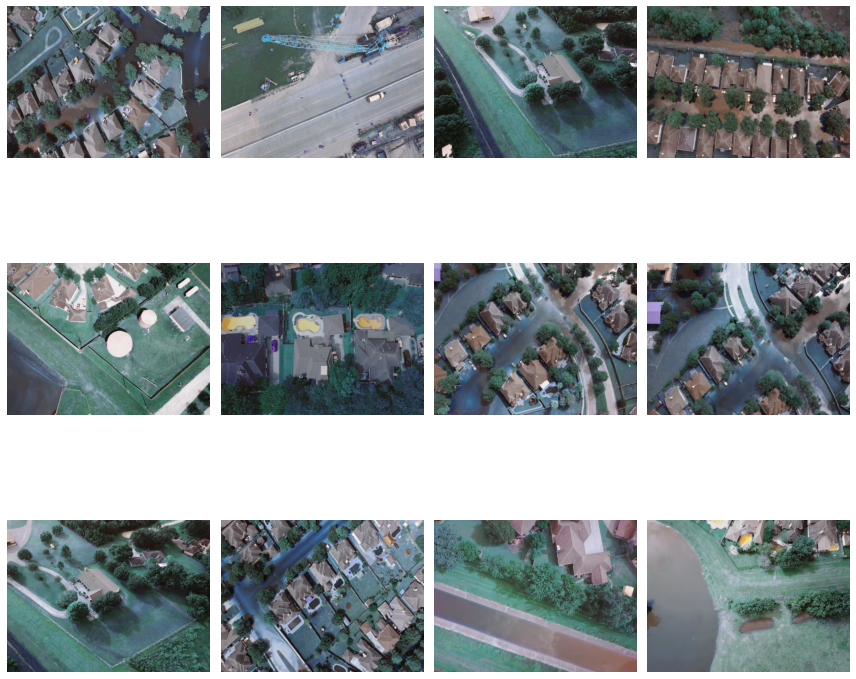

In [ ]:
print('Test Set - Flooded')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_fl[i])
    img = cv2.resize(img, (400,300))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Non-Flooded


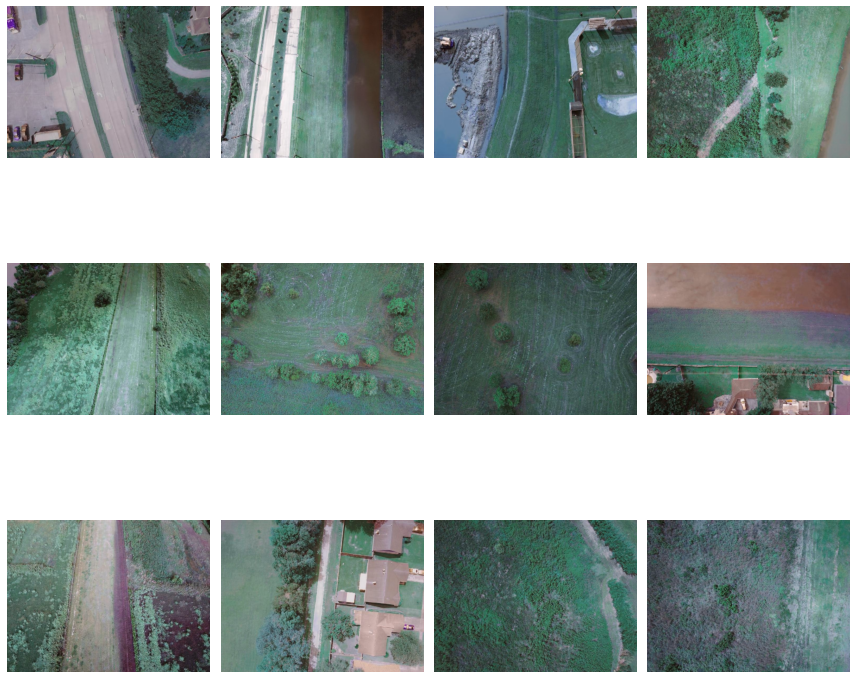

In [ ]:
print('Test Set - Non-Flooded')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_nfl[i])
    img = cv2.resize(img, (400,300))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

# Data Pre-Processing

In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [ ]:
train_df

class  \
1228  Non-Flooded   
1443  Non-Flooded   
1772  Non-Flooded   
752   Non-Flooded   
728   Non-Flooded   
...           ...   
1325  Non-Flooded   
911   Non-Flooded   
1836  Non-Flooded   
208       Flooded   
1409  Non-Flooded   

                                                                                image  
1228  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/7838.jpg  
1443  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8386.jpg  
1772  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/7028.jpg  
752   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8045.jpg  
728   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8359.jpg  
...                                                                               ...  
1325  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8387.jpg  
911   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/6630.jpg  
1836  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/7849.jpg  
208       /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Flooded/7610.jpg  
1409  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/9022.jpg  

[1516 rows x 2 columns]

In [ ]:
val_df

class  \
337   Non-Flooded   
850   Non-Flooded   
1490  Non-Flooded   
1254  Non-Flooded   
256   Non-Flooded   
...           ...   
1332  Non-Flooded   
923   Non-Flooded   
758   Non-Flooded   
799   Non-Flooded   
280   Non-Flooded   

                                                                                image  
337   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/6438.jpg  
850   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/7346.jpg  
1490  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8600.jpg  
1254  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/9365.jpg  
256   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8996.jpg  
...                                                                               ...  
1332  /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/7718.jpg  
923   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8331.jpg  
758   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/8182.jpg  
799   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/6970.jpg  
280   /content/drive/MyDrive/Compressed_PCA_images/Train/Labeled/Non-Flooded/7226.jpg  

[379 rows x 2 columns]

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (512, 768),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (512, 768),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (512, 768),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 1516 validated image filenames belonging to 2 classes.
Found 379 validated image filenames belonging to 2 classes.
Found 448 validated image filenames belonging to 2 classes.


# Training

In [ ]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

In [ ]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(512, 768, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(512, 768, 3))
    
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

234561536/234545216 [==============================] - 4s 0us/step


In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 768, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 16, 24, 2048)      58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
47/47 [==============================] - 1075s 22s/step - loss: 0.3896 - binary_accuracy: 0.8430 - val_loss: 0.2571 - val_binary_accuracy: 0.8760 - lr: 5.0000e-05
Epoch 2/50
47/47 [==============================] - 179s 4s/step - loss: 0.2265 - binary_accuracy: 0.9129 - val_loss: 0.1633 - val_binary_accuracy: 0.9525 - lr: 5.0000e-05
Epoch 3/50
47/47 [==============================] - 180s 4s/step - loss: 0.1745 - binary_accuracy: 0.9505 - val_loss: 0.1280 - val_binary_accuracy: 0.9551 - lr: 5.0000e-05
Epoch 4/50
47/47 [==============================] - 180s 4s/step - loss: 0.1472 - binary_accuracy: 0.9611 - val_loss: 0.1076 - val_binary_accuracy: 0.9631 - lr: 5.0000e-05
Epoch 5/50
47/47 [==============================] - 180s 4s/step - loss: 0.1280 - binary_accuracy: 0.9617 - val_loss: 0.0928 - val_binary_accuracy: 0.9763 - lr: 5.0000e-05
Epoch 6/50
47/47 [==============================] - 178s 4s/step - loss: 0.1228 - binary_accuracy: 0.9617 - val_loss: 0.0841 - val_binary_

In [ ]:
# Save the model
model_pretrained.save('/content/drive/MyDrive/NEW_PCA_best_model.h5')

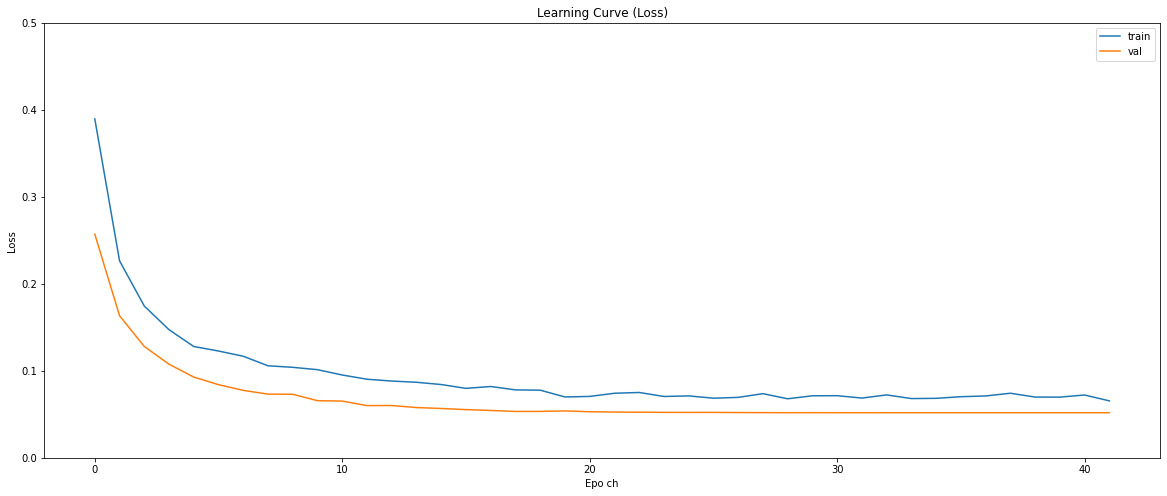

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epo ch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

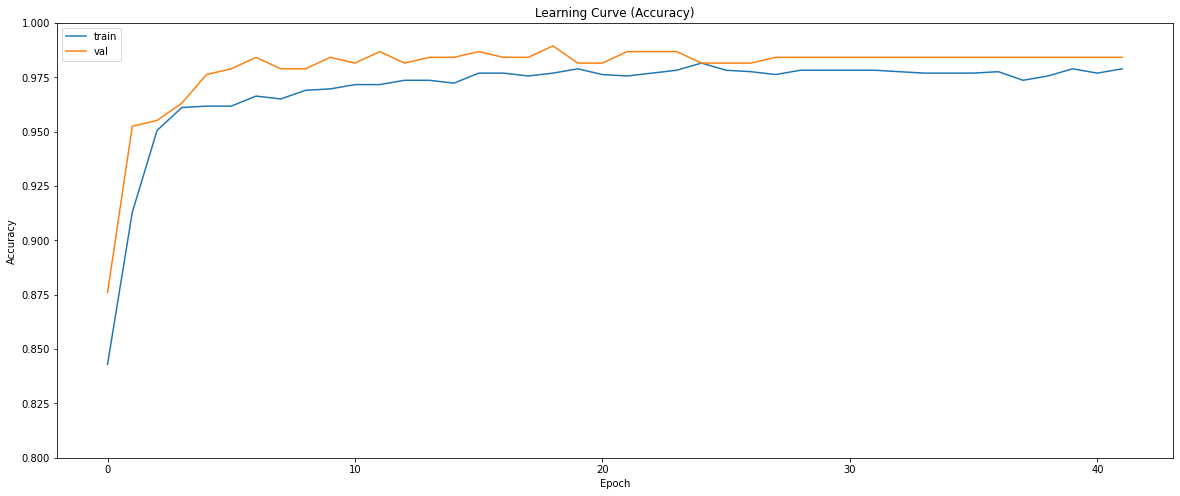

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.05184364318847656
Val accuracy: 0.9841688871383667


In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25276967883110046
Test accuracy: 0.9308035969734192


# Testing

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/drive/MyDrive/Floodnet_Project/NEW_PCA_best_model.h5')

In [ ]:
num_label = {'Flooded': 0, 'Non-Flooded' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [ ]:
ds_test.reset()
predictions = new_model.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.9308035714285714


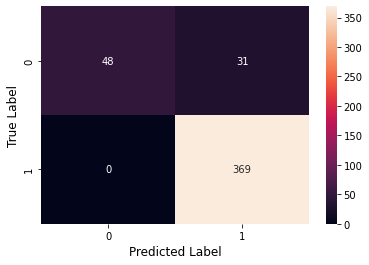

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        79
           1       0.92      1.00      0.96       369

    accuracy                           0.93       448
   macro avg       0.96      0.80      0.86       448
weighted avg       0.94      0.93      0.92       448



ROC_AUC:  0.9291619498473466


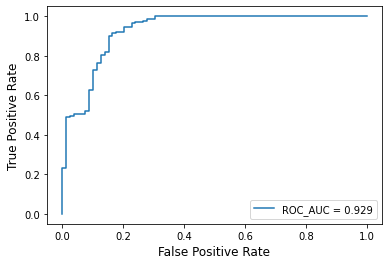

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()

Predicted: Flooded
Actual: Flooded


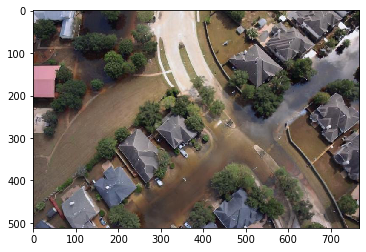

In [ ]:
i=7 # 4 - NF 0 - F

pred = new_model.predict(ds_test[i][0])[0][0]
actual = Y_test[i]

if pred> 0.5:
  print('Predicted: Non-Flooded') 
else:
  print('Predicted: Flooded') 

if actual==1:
  print('Actual: Non-Flooded') 
else:
  print('Actual: Flooded') 

plt.imshow(ds_test[i][0][0], interpolation='nearest')
plt.show()